#Proyecto 1- Parte final (Core)
Proyecto 1: Análisis y Predicción de Ventas en una Tienda de Retail
#Parte 1: Exploración y Visualización de Datos (EDA)

In [ ]:
# Importacion de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Carga de datos
df = pd.read_csv("/content/retail_sales_dataset.csv")

In [ ]:
# Imprime todos los tipos de datos de las variables del df
print("Tipos de datos de las variables:")
display(df.dtypes)

Tipos de datos de las variables:


,0
Transaction ID,int64
Date,object
Customer ID,object
Gender,object
Age,int64
Product Category,object
Quantity,int64
Price per Unit,int64
Total Amount,int64


In [ ]:
# Imprime las primeras filas del df
print("Primeras filas del conjunto de datos:")
display(df.head())

Primeras filas del conjunto de datos:


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
# Imprime valores outliers
# df.shape[0] número de filas y df.shape[1] número de columnas
print(f"El conjunto de datos tiene {df.shape[0]} filas y {df.shape[1]} columnas.\n")
print("Resumen estadístico de las características numéricas:")
# df.describe() para calcular estadísticas descriptivas com la media, desviación estándar, valores mínimo y máximo, y percentiles para cada columna numérica.
display(df.describe())

El conjunto de datos tiene 1000 filas y 9 columnas.

Resumen estadístico de las características numéricas:


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
# Selecciona solo columnas numericas
numeric_df = df.select_dtypes(include=np.number)
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
# Definir límites de detección
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
# Ver cantidad de outliers por variable
outliers = ((numeric_df < limite_inferior) | (numeric_df > limite_superior)).sum()
print("Cantidad de outliers por variable:")
print(outliers)

Cantidad de outliers por variable:
Transaction ID    0
Age               0
Quantity          0
Price per Unit    0
Total Amount      0
dtype: int64


In [ ]:
# Imprime todos los valores nulos por columna del df
# df.isnull() devuelve un DataFrame booleano donde los valores nulos son marcados como True.
# .sum() cuenta la cantidad de valores True (nulos) en cada columna.
print("Cantidad de valores nulos por columna:")
display(df.isnull().sum())

Cantidad de valores nulos por columna:


,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [ ]:
# Imprime la cantidad de valores únicos en cada columna del DataFrame.
print("Cantidad de valores únicos por columna:")
display(df.nunique())

Cantidad de valores únicos por columna:


,0
Transaction ID,1000
Date,345
Customer ID,1000
Gender,2
Age,47
Product Category,3
Quantity,4
Price per Unit,5
Total Amount,18


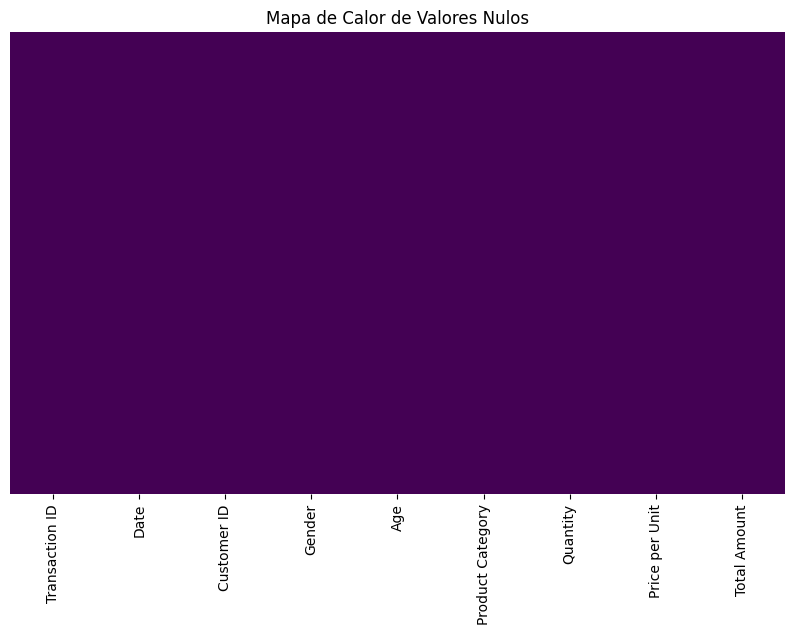

In [ ]:
# Visualizar los valores nulos en el df con un mapa de calor.
plt.figure(figsize=(10, 6))
# yticklabels=False elimina las etiquetas del eje Y para mayor claridad.
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Mapa de Calor de Valores Nulos")
plt.show()

Análisis de Correlación:

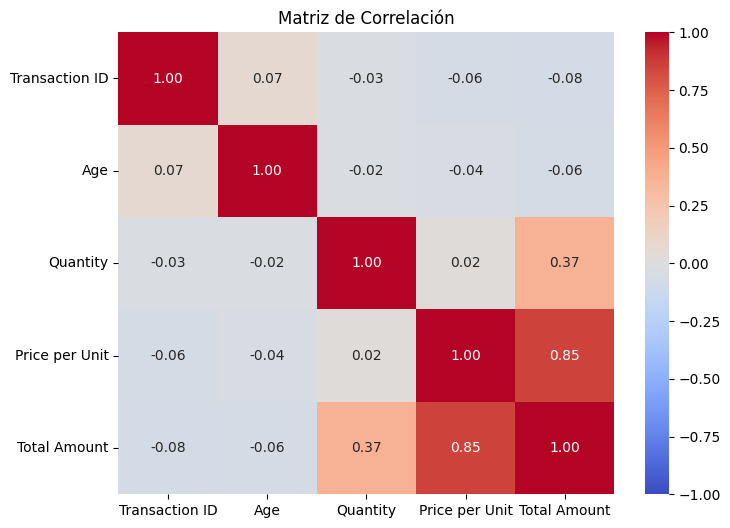

In [ ]:
# Calcular la matriz de correlación del df, para ver la relación lineal entre variables numéricas
# Excluir columnas no numéricas para evitar el error
correlation = df.select_dtypes(include=np.number).drop(columns=['Date'], errors='ignore').corr()  # Excluir columna 'Date' si existe
# Visualizar la matriz de correlación como un mapa de calor.
plt.figure(figsize=(8, 6))
# Generar el mapa de calor utilizando Seaborn:
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()

Visualización de Datos:

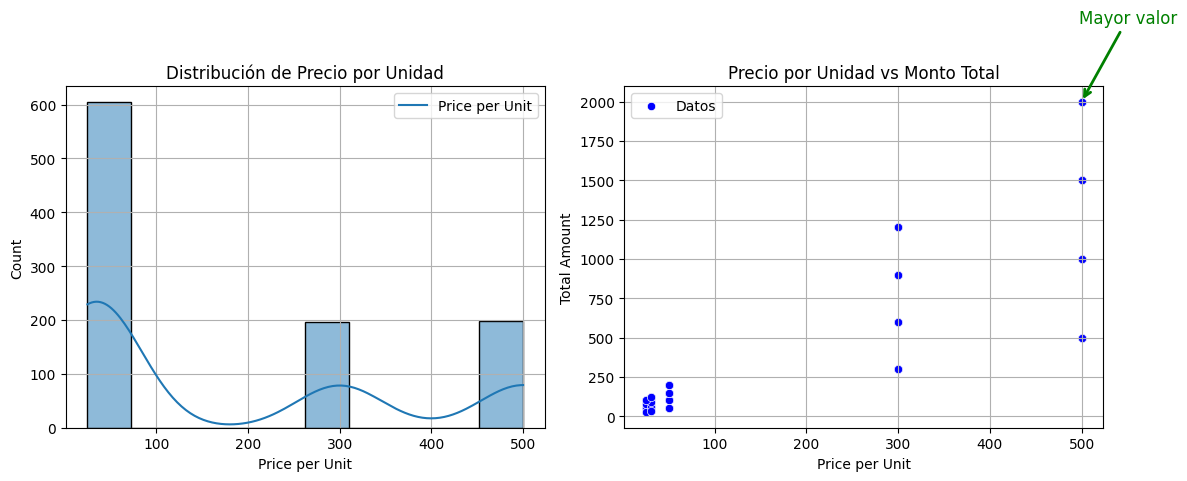

In [ ]:
# Crear figura y subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Subplot univariado
sns.histplot(df['Price per Unit'], bins=10, kde=True, ax=axes[0])
axes[0].set_title('Distribución de Precio por Unidad')
axes[0].grid(True)
axes[0].legend(['Price per Unit'])

# Subplot multivariado
sns.scatterplot(x=df['Price per Unit'], y=df['Total Amount'], ax=axes[1], color='blue', label='Datos')
axes[1].set_title('Precio por Unidad vs Monto Total')
axes[1].grid(True)
axes[1].legend()

# Anotación y flecha en el punto más alto
max_point = df.iloc[df['Total Amount'].idxmax()]
axes[1].annotate('Mayor valor', xy=(max_point['Price per Unit'], max_point['Total Amount']),
                 xytext=(max_point['Price per Unit'] - 3, max_point['Total Amount'] + 500),
                 arrowprops=dict(arrowstyle='->', color='green', lw=2), fontsize=12, color='green')

plt.tight_layout()
plt.show()

#Parte 2: Preprocesamiento de Datos

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Definir columnas categóricas y numéricas
categorical_features = ['Gender', 'Product Category']
numerical_features = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
# Crear transformador de columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)
# Crear pipeline con el preprocesador
pipeline = Pipeline([
    ('preprocessing', preprocessor)  # Paso único: aplicar transformaciones
])
# Aplicar transformación
transformed_df = pipeline.fit_transform(df)
# Convertir a df con nombres de columnas
feature_names = pipeline.named_steps['preprocessing'].get_feature_names_out()
transformed_df = pd.DataFrame(transformed_df, columns=feature_names)

print(transformed_df)

     cat__Gender_Female  cat__Gender_Male  cat__Product Category_Beauty  \
0                   0.0               1.0                           1.0   
1                   1.0               0.0                           0.0   
2                   0.0               1.0                           0.0   
3                   0.0               1.0                           0.0   
4                   0.0               1.0                           1.0   
..                  ...               ...                           ...   
995                 0.0               1.0                           0.0   
996                 0.0               1.0                           1.0   
997                 1.0               0.0                           1.0   
998                 1.0               0.0                           0.0   
999                 0.0               1.0                           0.0   

     cat__Product Category_Clothing  cat__Product Category_Electronics  \
0                        

#Parte 3: Benchmarking de Técnicas de Machine Learning
Selección de Modelos:

In [ ]:
# Importar las librerías
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Seleccionar las características y la variable objetivo
X = df[['Age', 'Quantity', 'Price_per_Unit']]
y = df['Total_Amount']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar los modelos
models = {
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Validación cruzada para cada modelo
print("Resultados de validación cruzada:")
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"{name}: Precisión promedio = {np.mean(scores):.4f}")

# Optimización de hiperparámetros para KNN
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print(f"Mejor número de vecinos para KNN: {grid_search.best_params_['n_neighbors']}")

Resultados de validación cruzada:
KNN: Precisión promedio = 0.7100
Random Forest: Precisión promedio = 0.9975
Logistic Regression: Precisión promedio = 0.5725
Mejor número de vecinos para KNN: 3


Comparación de Modelos:

In [ ]:
# Importar librerías
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Nuevo diccionario 'best_models' donde cada modelo está entrenado y listo para hacer predicciones
best_models = {
    "KNN": KNeighborsClassifier().fit(X_train_scaled, y_train),
    "Random Forest": RandomForestClassifier().fit(X_train_scaled, y_train),
    "Logistic Regression": LogisticRegression().fit(X_train_scaled, y_train)
}

# Evaluar cada modelo con las métricas requeridas
for name, model in best_models.items():
    y_probs = model.predict_proba(X_test_scaled)

    # Calcular métricas con zero_division=1 para evitar problemas de etiquetas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)


    print(f"\n{name} - Evaluación del Modelo:")
    print(f"Exactitud: {accuracy:.4f}")
    print(f"Precisión: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"\n{name} - Probabilidades de Predicción:")
    print(y_probs[:5])  # Mostrar las primeras 5 predicciones


KNN - Evaluación del Modelo:
Exactitud: 0.5750
Precisión: 0.6815
Recall: 0.5750
F1-Score: 0.5286

KNN - Probabilidades de Predicción:
[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.6 0.  0.  0.4 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.6 0.4 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]]

Random Forest - Evaluación del Modelo:
Exactitud: 0.5750
Precisión: 0.6815
Recall: 0.5750
F1-Score: 0.5286

Random Forest - Probabilidades de Predicción:
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.06
  0.06 0.   0.85 0.02]
 [0.   0.01 0.01 0.06 0.   0.01 0.91 0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.95 0.01 0.04 0.
  0.   0.   0.   0.  ]
 [0.01 0.   0.   0.   0.01 0.   0.97 0.01 0.   0.   0

#Parte 4: Análisis de Métricas

Generar un informe de clasificación para cada modelo.


KNN - Informe de Clasificación:
              precision    recall  f1-score   support

          25       0.40      0.20      0.27        10
          30       0.22      0.57      0.32         7
          50       0.61      0.65      0.63        17
          60       0.17      0.11      0.13         9
          75       0.64      0.88      0.74         8
          90       0.44      0.44      0.44         9
         100       0.81      0.57      0.67        23
         120       0.38      0.71      0.50         7
         150       0.67      0.44      0.53         9
         200       0.93      0.76      0.84        17
         300       1.00      1.00      1.00        15
         500       1.00      1.00      1.00         8
         600       1.00      1.00      1.00         5
         900       1.00      1.00      1.00        14
        1000       1.00      1.00      1.00        12
        1200       1.00      1.00      1.00        10
        1500       1.00      1.00      1.00     

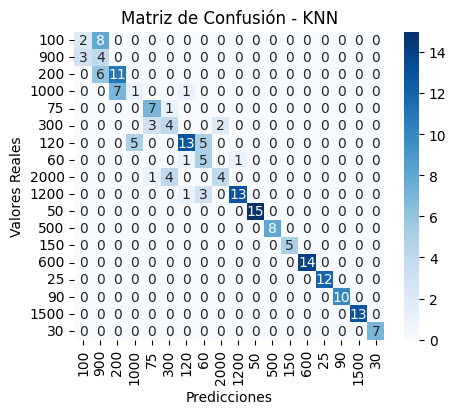


Random Forest - Informe de Clasificación:
              precision    recall  f1-score   support

          25       1.00      1.00      1.00        10
          30       1.00      1.00      1.00         7
          50       1.00      1.00      1.00        17
          60       1.00      1.00      1.00         9
          75       1.00      1.00      1.00         8
          90       1.00      1.00      1.00         9
         100       1.00      1.00      1.00        23
         120       1.00      1.00      1.00         7
         150       1.00      1.00      1.00         9
         200       1.00      1.00      1.00        17
         300       1.00      1.00      1.00        15
         500       1.00      1.00      1.00         8
         600       1.00      1.00      1.00         5
         900       1.00      1.00      1.00        14
        1000       1.00      1.00      1.00        12
        1200       1.00      1.00      1.00        10
        1500       1.00      1.00     

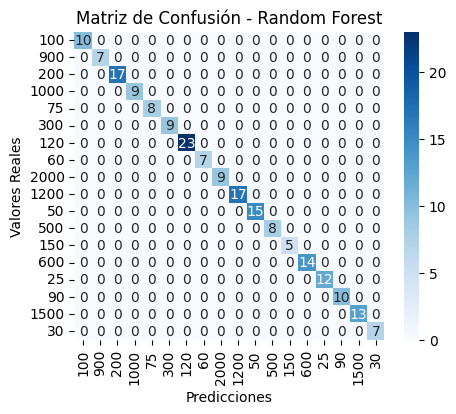


Logistic Regression - Informe de Clasificación:
              precision    recall  f1-score   support

          25       0.14      0.10      0.12        10
          30       0.00      0.00      0.00         7
          50       0.31      0.76      0.44        17
          60       0.00      0.00      0.00         9
          75       0.00      0.00      0.00         8
          90       0.00      0.00      0.00         9
         100       0.00      0.00      0.00        23
         120       0.30      0.43      0.35         7
         150       0.00      0.00      0.00         9
         200       0.50      0.82      0.62        17
         300       1.00      1.00      1.00        15
         500       1.00      1.00      1.00         8
         600       1.00      1.00      1.00         5
         900       1.00      1.00      1.00        14
        1000       1.00      1.00      1.00        12
        1200       1.00      1.00      1.00        10
        1500       1.00      1.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


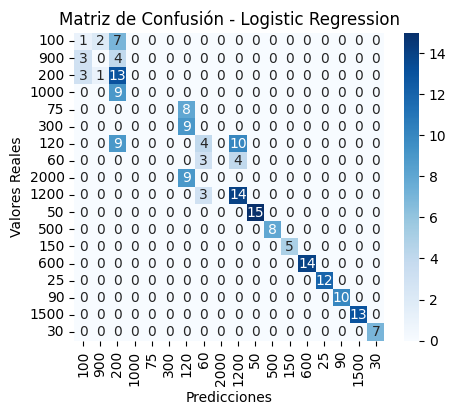

In [ ]:
# Importar librerias
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluar cada modelo y mostrar la matriz de confusión
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)  # Generar predicciones
    cm = confusion_matrix(y_test, y_pred)  # Matriz de confusión

    print(f"\n{name} - Informe de Clasificación:")
    print(classification_report(y_test, y_pred))  # Mostrar informe de clasificación

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
    plt.xlabel("Predicciones")
    plt.ylabel("Valores Reales")
    plt.title(f"Matriz de Confusión - {name}")
    plt.show()


Curva ROC y AUC:

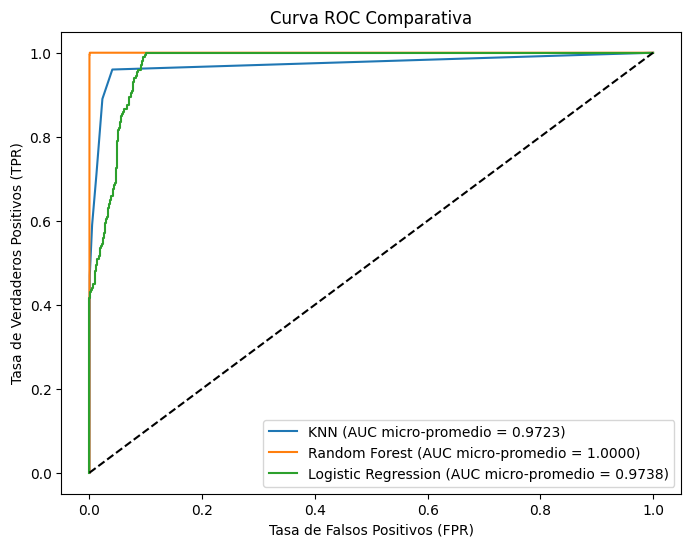

In [ ]:
# Importar librerías
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Generar y visualizar la curva ROC para cada modelo
plt.figure(figsize=(8, 6))

for name, model in best_models.items():
    # Binarizar la variable objetivo para cada clase
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_bin.shape[1]

    # Calcular la curva ROC y el área ROC para cada clase
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        y_probs_i = model.predict_proba(X_test_scaled)[:, i]
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs_i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Calcular la curva de ROC y el área ROC micro-promedio
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), model.predict_proba(X_test_scaled).ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Graficar la curva de ROC micro-promedio
    plt.plot(fpr["micro"], tpr["micro"],
             label=f"{name} (AUC micro-promedio = {roc_auc['micro']:.4f})")

# Configuracion de la gráfica
plt.plot([0, 1], [0, 1], "k--")  # Línea diagonal
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC Comparativa")
plt.legend(loc="lower right")
plt.show()
